In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np

# Data Preprocessing

In [24]:
df = pd.read_csv('yolo_keypoints.csv')
df.fillna(0, inplace=True)
df.head()

,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17
0,normal,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,normal,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,505.508728,...,408.614563,275.584564,446.185730,349.662231,473.656982,357.108307,0.0,0.0,454.489624,414.599915
2,normal,512.199951,172.515274,0.0,0.0,513.500977,163.846848,0.0,0.0,499.960938,...,401.607605,269.582977,455.879761,341.845276,448.513611,340.204590,0.0,0.0,419.692749,416.802338
3,normal,410.010925,92.829506,0.0,0.0,409.460449,81.514099,0.0,0.0,386.344849,...,326.337982,239.760880,355.108734,352.502228,328.683350,341.448975,0.0,0.0,0.000000,0.000000
4,normal,402.492767,85.945152,0.0,0.0,400.969025,75.369980,0.0,0.0,377.160828,...,318.038605,235.032333,350.634338,350.382324,321.777618,342.930847,0.0,0.0,0.000000,0.000000


In [25]:
df['class'] = df['class'].apply(lambda x: 0 if x == 'normal' else 1)

In [26]:
df.tail()

,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17
80,1,314.924866,205.822021,0.0,0.0,309.739044,198.490036,0.0,0.0,281.416321,...,198.935028,328.403748,311.900421,366.045013,229.509674,369.789276,312.477661,414.407471,0.000000,0.000000
81,1,352.699493,198.597000,0.0,0.0,350.851990,190.000916,0.0,0.0,324.766907,...,222.798676,302.127472,323.827362,369.802368,226.259827,368.069702,0.000000,0.000000,0.000000,0.000000
82,1,352.892517,200.420990,0.0,0.0,351.701477,191.203476,0.0,0.0,326.138367,...,223.324890,306.015808,322.363586,372.834595,228.025330,372.497101,0.000000,0.000000,0.000000,0.000000
83,1,413.084076,210.005844,0.0,0.0,413.065887,201.413559,0.0,0.0,397.446838,...,260.920959,265.303406,301.341553,359.473999,248.368805,358.822113,288.146759,417.912109,203.982117,422.621643
84,1,433.202332,214.306885,0.0,0.0,434.052216,206.427109,0.0,0.0,423.453491,...,280.639343,250.641785,303.045959,354.637451,273.362640,350.803314,292.295013,426.977966,233.211060,425.230347


In [27]:
df['class'].value_counts()

class
1    43
0    42
Name: count, dtype: int64

# Split Data

In [28]:
from sklearn.model_selection import train_test_split

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((68, 34), (17, 34), (68,), (17,))

In [29]:
X_train.shape[1:]

(34,)

# Model Building

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1:])),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    'best_model.h5',
    save_best_only=True,
    monitor='val_loss',
    mode='max'
)

d:\Project Coding\Penelitian\suspicious_detection_cctv\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         4,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,849 (58.00 KB)

 Trainable params: 14,849 (58.00 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
import matplotlib.pyplot as plt
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

Epoch 1/20
1/2 ━━━━━━━━━━━━━━━━━━━━ 6s 7s/step - accuracy: 0.5625 - loss: 28.2675

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 551ms/step - accuracy: 0.5085 - loss: 28.5459 - val_accuracy: 0.5000 - val_loss: 13.0224
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.6177 - loss: 14.8970 - val_accuracy: 0.5000 - val_loss: 8.4363
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.5721 - loss: 15.0647 - val_accuracy: 0.5714 - val_loss: 6.0100
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.6528 - loss: 8.9540 - val_accuracy: 0.7143 - val_loss: 4.3270
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 303ms/step - accuracy: 0.7315 - loss: 10.1747 - val_accuracy: 0.7143 - val_loss: 3.6937
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.6651 - loss: 13.6473 - val_accuracy: 0.7857 - val_loss: 4.0792
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.7106 - loss: 6.0320 - val_accuracy: 0.7857 - val_loss: 4.8652
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.7211 - loss: 7.0547 - val_accuracy: 0.7857 - val_loss: 5.71

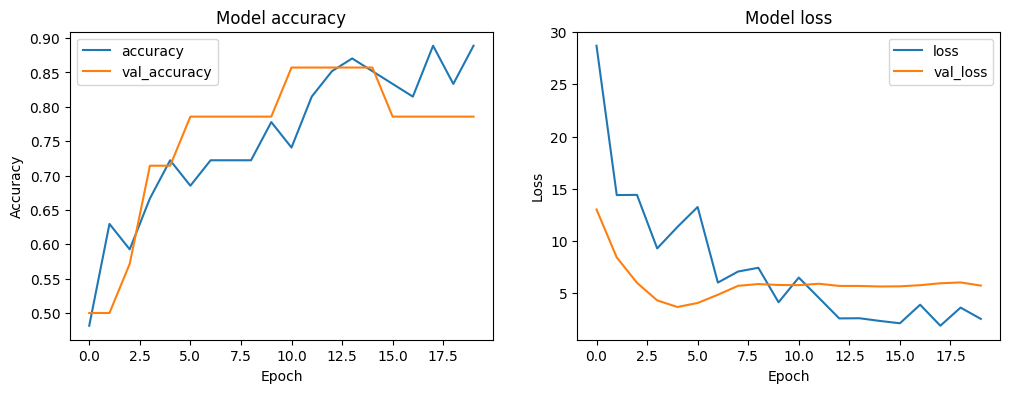

In [33]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[checkpoint_cb]
)

plot_history(history)

In [34]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 1.0000 - loss: 4.2275e-05


[4.2274514271412045e-05, 1.0]

In [35]:
y_pred = model.predict(X_test)
y_pred = [1 if p > 0.5 else 0 for p in y_pred]
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         9

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



In [22]:
y_pred[:5]

[0, 1, 0, 1, 1]